<a href="https://colab.research.google.com/github/cinthia005/Lab-PDI/blob/main/AF4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACTIVIDAD FUNDAMENTAL 4 - PROCESAMIENTO DIGITAL DE IMÁGENES**
CINTHIA JANETH PECINA HERNÁNDEZ 2062979 IB

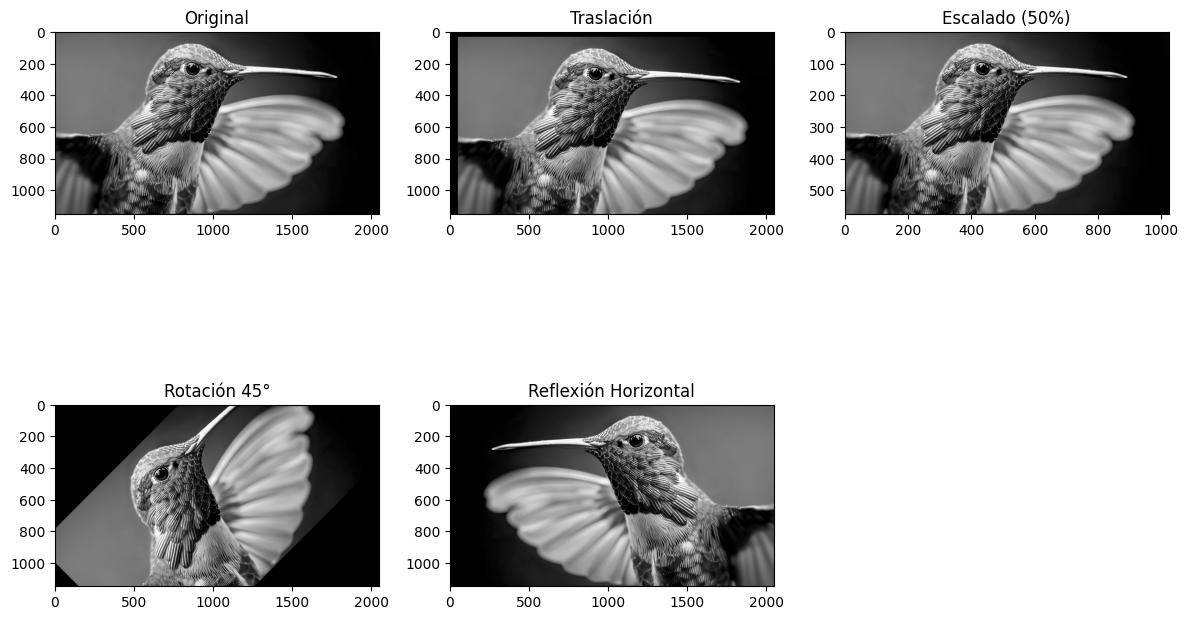

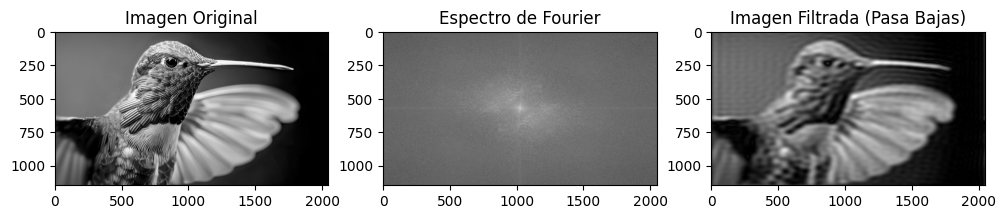

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# PARTE 1: TRANSFORMACIONES GEOMÉTRICAS
# ==========================================

# 1. Carga de imagen
img = cv2.imread('ave_2.jpg', 0)
rows, cols = img.shape

# 2. Traslación
# Matriz de traslación: [[1, 0, tx], [0, 1, ty]]
# Movemos 50px a la derecha y 30px abajo
M_trans = np.float32([[1, 0, 50], [0, 1, 30]])
img_trans = cv2.warpAffine(img, M_trans, (cols, rows))

# 3. Escalado
# Reducimos la imagen a la mitad (0.5)
img_scale = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)

# 4. Rotación
# Rotamos 45 grados respecto al centro
M_rot = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1) # Centro, Ángulo, Escala
img_rot = cv2.warpAffine(img, M_rot, (cols, rows))

# 5. Reflexión (Flip)
# 1 = Horizontal, 0 = Vertical, -1 = Ambos
img_flip = cv2.flip(img, 1)

# --- Visualización Parte 1 ---
plt.figure(figsize=(12, 8))
plt.subplot(231), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(232), plt.imshow(img_trans, cmap='gray'), plt.title('Traslación')
plt.subplot(233), plt.imshow(img_scale, cmap='gray'), plt.title('Escalado (50%)')
plt.subplot(234), plt.imshow(img_rot, cmap='gray'), plt.title('Rotación 45°')
plt.subplot(235), plt.imshow(img_flip, cmap='gray'), plt.title('Reflexión Horizontal')
plt.tight_layout()
plt.show()

# ==========================================
# PARTE 2: TRANSFORMADA DE FOURIER
# ==========================================

# 1. Aplicar DFT
dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft) # Mover frecuencia cero al centro

# 2. Obtener magnitud (espectro)
# Usamos logaritmo porque el rango dinámico es muy grande
magnitude_spectrum = 20 * np.log(np.abs(dft_shift))

# 3. Ejemplo de Enmascaramiento (Filtrado)
# Vamos a eliminar frecuencias altas (Filtro Pasa Bajas - Suavizado)
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2 # Centro
mask = np.zeros((rows, cols), np.uint8)
r = 30 # Radio del filtro
# Crear un círculo blanco en el centro (pasan bajas frecuencias)
cv2.circle(mask, (ccol, crow), r, 1, thickness=-1)

# Aplicar máscara al dominio de frecuencia
fshift = dft_shift * mask
# Reconstruir imagen (Transformada Inversa)
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# --- Visualización Parte 2 ---
plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Imagen Original')
plt.subplot(132), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Espectro de Fourier')
plt.subplot(133), plt.imshow(img_back, cmap='gray'), plt.title('Imagen Filtrada (Pasa Bajas)')
plt.show()